In [170]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import clone
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('GES_RES_data.csv')
df.head()

,Saat,Yuk Tahmin Plani (MWh),Ikili Anlasma (MWh),PTF (TL/MWh)Okuma Yukumlulu,SAM (MWh),SSM(MWh),KGUP (MWh),SMF (TL/MWh),YAL (0) Kodlu (MWh),YAL (1) Kodlu (MWh),...,Ucpinar_Windy Estimated Wind Rate (m/s),Ucpinar_Windy Final (m/s),Ucpinar_Final Production (MWh),Ucpinar_KGUP (MWh),Ucpinar_Actual KGUP (MWh),Geycek_Windy Estimated Wind Rate (m/s),Geycek_Windy Final (m/s),Geycek_Final Production (MWh),Geycek_KGUP (MWh),Geycek_Actual KGUP (MWh)
0,27/04/2021 00:00,34226.0,31400.5,325.94,21980.5,21980.5,31669.89,355.94,651.00,0.0,...,2,2,35.94,NaN,26.7,5,5,107.0,NaN,120.08
1,27/04/2021 01:00,32910.0,27333.1,331.03,23674.1,23674.1,30531.04,361.03,622.83,0.0,...,3,2,33.59,NaN,18.7,3,5,100.0,NaN,92.80
2,27/04/2021 02:00,32334.0,26758.6,331.13,23621.9,23621.9,29899.17,361.13,565.00,0.0,...,3,3,39.94,NaN,19.5,3,4,72.0,NaN,81.40
3,27/04/2021 03:00,32269.0,26769.5,331.20,23437.8,23437.8,29652.16,358.00,565.00,0.0,...,3,3,39.00,NaN,15.5,3,4,53.0,NaN,70.40
4,27/04/2021 04:00,31823.0,26725.7,328.71,22844.1,22844.1,29087.80,358.71,451.00,0.0,...,3,3,16.91,NaN,10.6,3,4,42.0,NaN,59.20


In [83]:
df['spread'] = df['SMF (TL/MWh)'] - df['PTF (TL/MWh)Okuma Yukumlulu']
df['net_load'] = df['YAL (0) Kodlu (MWh)'] + df['YAL (1) Kodlu (MWh)'] + df['YAL (3) Kodlu (MWh)'] - df['YAL Teslim Edilmeyen (MWh)'] - df['YAT (0) Kodlu (MWh)'] - df['YAT (1) Kodlu (MWh)'] - df['YAT (2) Kodlu (MWh)'] + df['YAT Teslim Edilmeyen (MWh)']

In [84]:
df.head()

,Saat,Yuk Tahmin Plani (MWh),Ikili Anlasma (MWh),PTF (TL/MWh)Okuma Yukumlulu,SAM (MWh),SSM(MWh),KGUP (MWh),SMF (TL/MWh),YAL (0) Kodlu (MWh),YAL (1) Kodlu (MWh),...,Ucpinar_Final Production (MWh),Ucpinar_KGUP (MWh),Ucpinar_Actual KGUP (MWh),Geycek_Windy Estimated Wind Rate (m/s),Geycek_Windy Final (m/s),Geycek_Final Production (MWh),Geycek_KGUP (MWh),Geycek_Actual KGUP (MWh),spread,net_load
0,27/04/2021 00:00,34226.0,31400.5,325.94,21980.5,21980.5,31669.89,355.94,651.00,0.0,...,35.94,NaN,26.7,5,5,107.0,NaN,120.08,30.0,410.32
1,27/04/2021 01:00,32910.0,27333.1,331.03,23674.1,23674.1,30531.04,361.03,622.83,0.0,...,33.59,NaN,18.7,3,5,100.0,NaN,92.80,30.0,434.45
2,27/04/2021 02:00,32334.0,26758.6,331.13,23621.9,23621.9,29899.17,361.13,565.00,0.0,...,39.94,NaN,19.5,3,4,72.0,NaN,81.40,30.0,455.39
3,27/04/2021 03:00,32269.0,26769.5,331.20,23437.8,23437.8,29652.16,358.00,565.00,0.0,...,39.00,NaN,15.5,3,4,53.0,NaN,70.40,26.8,328.25
4,27/04/2021 04:00,31823.0,26725.7,328.71,22844.1,22844.1,29087.80,358.71,451.00,0.0,...,16.91,NaN,10.6,3,4,42.0,NaN,59.20,30.0,370.82


In [85]:
df.columns

Index(['Saat', 'Yuk Tahmin Plani (MWh)', 'Ikili Anlasma (MWh)',
       'PTF (TL/MWh)Okuma Yukumlulu', 'SAM (MWh)', 'SSM(MWh)', 'KGUP (MWh)',
       'SMF (TL/MWh)', 'YAL (0) Kodlu (MWh)', 'YAL (1) Kodlu (MWh)',
       'YAL (2) Kodlu (MWh)', 'YAL Teslim Edilmeyen (MWh)',
       'YAT (0) Kodlu (MWh)', 'YAT (1) Kodlu (MWh)', 'YAT (2) Kodlu (MWh)',
       'YAT Teslim Edilmeyen (MWh)',
       'KARAPINAR_Windy Estimated Cloudiness Rate (%)',
       'KARAPINAR_Windy Final (%)', 'KARAPINAR_Final Production (MWh)',
       'KARAPINAR_KGUP (MWh)', 'KARAPINAR_Actual KGUP (MWh)',
       'KIVANC_Windy Estimated Cloudiness Rate (%)', 'KIVANC_Windy Final (%)',
       'KIVANC_Final Production (MWh)', 'KIVANC_KGUP (MWh)',
       'KIVANC_Actual KGUP (MWh)',
       'TEKSIN_Windy Estimated Cloudiness Rate (%)', 'TEKSIN_Windy Final (%)',
       'TEKSIN_Final Production (MWh)', 'TEKSIN_KGUP (MWh)',
       'TEKSIN_Actual KGUP (MWh)',
       'CINGILLI_Windy Estimated Cloudiness Rate (%)',
       'CINGILLI_Windy

In [86]:
df = df.drop(['Saat', 'Yuk Tahmin Plani (MWh)', 'Ikili Anlasma (MWh)',
       'PTF (TL/MWh)Okuma Yukumlulu', 'SAM (MWh)', 'SSM(MWh)', 'KGUP (MWh)',
       'SMF (TL/MWh)', 'YAL (0) Kodlu (MWh)', 'YAL (1) Kodlu (MWh)',
       'YAL (2) Kodlu (MWh)', 'YAL Teslim Edilmeyen (MWh)',
       'YAT (0) Kodlu (MWh)', 'YAT (1) Kodlu (MWh)', 'YAT (2) Kodlu (MWh)',
       'YAT Teslim Edilmeyen (MWh)','KARAPINAR_Windy Final (%)', 'KARAPINAR_Final Production (MWh)',
       'KARAPINAR_KGUP (MWh)', 'KARAPINAR_Actual KGUP (MWh)','KIVANC_Windy Final (%)',
       'KIVANC_Final Production (MWh)', 'KIVANC_KGUP (MWh)',
       'KIVANC_Actual KGUP (MWh)','TEKSIN_Windy Final (%)',
       'TEKSIN_Final Production (MWh)', 'TEKSIN_KGUP (MWh)',
       'TEKSIN_Actual KGUP (MWh)','CINGILLI_Windy Final (%)', 'CINGILLI_Final Production (MWh)',
       'CINGILLI_KGUP (MWh)', 'CINGILLI_Actual KGUP (MWh)','BUYUKALAN_Windy Final (%)', 'BUYUKALAN_Final Production (MWh)',
       'BUYUKALAN_KGUP (MWh)', 'BUYUKALAN_Actual KGUP (MWh)','Balikesir_Windy Final (m/s)', 'Balikesir_Final Production (MWh)',
       'Balikesir_KGUP (MWh)', 'Balikesir_Actual KGUP (MWh)','Gokcedag_Windy Final (m/s)', 'Gokcedag_Final Production (MWh)',
       'Gokcedag_KGUP (MWh)', 'Gokcedag_Actual KGUP (MWh)','Dinar_Windy Final (m/s)',
       'Dinar_Final Production (MWh)', 'Dinar_KGUP (MWh)',
       'Dinar_Actual KGUP (MWh)','Ucpinar_Windy Final (m/s)', 'Ucpinar_Final Production (MWh)',
       'Ucpinar_KGUP (MWh)', 'Ucpinar_Actual KGUP (MWh)','Geycek_Windy Final (m/s)',
       'Geycek_Final Production (MWh)', 'Geycek_KGUP (MWh)',
       'Geycek_Actual KGUP (MWh)', 'spread'], axis=1)

In [87]:
df.columns

Index(['KARAPINAR_Windy Estimated Cloudiness Rate (%)',
       'KIVANC_Windy Estimated Cloudiness Rate (%)',
       'TEKSIN_Windy Estimated Cloudiness Rate (%)',
       'CINGILLI_Windy Estimated Cloudiness Rate (%)',
       'BUYUKALAN_Windy Estimated Cloudiness Rate (%)',
       'Balikesir_Windy Estimated Wind Rate (m/s)',
       'Gokcedag_Windy Estimated Wind Rate (m/s)',
       'Dinar_Windy Estimated Wind Rate (m/s)',
       'Ucpinar_Windy Estimated Wind Rate (m/s)',
       'Geycek_Windy Estimated Wind Rate (m/s)', 'net_load'],
      dtype='object')

In [88]:
df['Date'] = pd.date_range(start = '20210427', freq = 'H' , periods = len(df))
df.dropna(inplace = True)
df.head()

,KARAPINAR_Windy Estimated Cloudiness Rate (%),KIVANC_Windy Estimated Cloudiness Rate (%),TEKSIN_Windy Estimated Cloudiness Rate (%),CINGILLI_Windy Estimated Cloudiness Rate (%),BUYUKALAN_Windy Estimated Cloudiness Rate (%),Balikesir_Windy Estimated Wind Rate (m/s),Gokcedag_Windy Estimated Wind Rate (m/s),Dinar_Windy Estimated Wind Rate (m/s),Ucpinar_Windy Estimated Wind Rate (m/s),Geycek_Windy Estimated Wind Rate (m/s),net_load,Date
24,2,0,0,0.0,22,1,1,1,0,1,-196.21,2021-04-28 00:00:00
25,2,0,0,0.0,22,1,1,1,0,1,-1.46,2021-04-28 01:00:00
26,18,0,0,0.0,22,1,1,1,0,2,0.00,2021-04-28 02:00:00
27,18,1,17,1.0,22,1,1,1,1,2,-102.18,2021-04-28 03:00:00
28,18,1,17,1.0,22,1,0,1,1,2,-79.27,2021-04-28 04:00:00


In [89]:
df['10_prev'] = df['net_load'].shift(10)
df['11_prev'] = df['net_load'].shift(11)
df['12_prev'] = df['net_load'].shift(12)

In [187]:
rowsData = []
for i, row in df.iterrows():

  data = dict(
      target = row.net_load,
      weekDay = row.Date.dayofweek,
      weekOfYear = row.Date.week,
      hourOfDay = row.Date.hour,
      dayOfMonth = row.Date.day,
      KARAPINAR_Windy = row['KARAPINAR_Windy Estimated Cloudiness Rate (%)'],
      KIVANC_Windy = row['KIVANC_Windy Estimated Cloudiness Rate (%)'],
      TEKSIN_Windy = row['TEKSIN_Windy Estimated Cloudiness Rate (%)'],
      CINGILLI_Windy = row['CINGILLI_Windy Estimated Cloudiness Rate (%)'],
      BUYUKALAN_Windy = row['BUYUKALAN_Windy Estimated Cloudiness Rate (%)'],
      Balikesir_Windy = row['Balikesir_Windy Estimated Wind Rate (m/s)'],
      Gokcedag_Windy = row['Gokcedag_Windy Estimated Wind Rate (m/s)'],
      Dinar_Windy = row['Dinar_Windy Estimated Wind Rate (m/s)'],
      Ucpinar_Windy = row['Ucpinar_Windy Estimated Wind Rate (m/s)'],
      Geycek_Windy = row['Geycek_Windy Estimated Wind Rate (m/s)'],
      TenPrev = row['10_prev'],
      ElevenPrev = row['11_prev'],
      TwelvePrev = row['12_prev']
      
      
)
  
  rowsData.append(data)
df_data = pd.DataFrame(rowsData)

In [188]:
df_data.dropna(inplace = True)

In [189]:
df_data

,target,weekDay,weekOfYear,hourOfDay,dayOfMonth,KARAPINAR_Windy,KIVANC_Windy,TEKSIN_Windy,CINGILLI_Windy,BUYUKALAN_Windy,Balikesir_Windy,Gokcedag_Windy,Dinar_Windy,Ucpinar_Windy,Geycek_Windy,TenPrev,ElevenPrev,TwelvePrev
12,598.06,2,17,12,28,2,0,0,4.0,47,2,1,3,1,3,0.00,-1.46,-196.21
13,1284.69,2,17,13,28,2,0,0,4.0,47,2,1,3,1,3,-102.18,0.00,-1.46
14,1531.23,2,17,14,28,27,8,2,0.0,11,4,2,5,0,5,-79.27,-102.18,0.00
15,1573.86,2,17,15,28,27,8,2,0.0,11,4,2,5,0,5,-194.18,-79.27,-102.18
16,1104.56,2,17,16,28,27,8,2,0.0,11,4,2,5,0,5,-1085.49,-194.18,-79.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1813.65,5,19,19,15,0,0,0,31.0,6,2,2,1,3,1,673.19,308.62,-95.97
428,1071.01,5,19,20,15,0,0,0,1.0,0,3,2,1,3,2,949.69,673.19,308.62
429,1100.77,5,19,21,15,0,0,0,1.0,0,3,2,1,3,2,1133.01,949.69,673.19
430,845.25,5,19,22,15,1,13,4,0.0,25,3,2,1,3,2,1359.88,1133.01,949.69


In [190]:
def get_models(models=dict()):
    # non-linear models
    models['knn'] = KNeighborsRegressor(n_neighbors=7)
    models['DecisionTreeRegressor'] = DecisionTreeRegressor()
    models['extraTreeRegressor'] = ExtraTreeRegressor()
    models['SVR'] = SVR()
    # # ensemble models
    n_trees = 100
    models['adaBoost'] = AdaBoostRegressor(n_estimators=n_trees)
    models['baggingRegressor'] = BaggingRegressor(n_estimators=n_trees)
    models['RandomForest'] = RandomForestRegressor(n_estimators=n_trees)
    models['extraTreesRegressor'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['GradientBoosting'] = GradientBoostingRegressor(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models


In [191]:
models = get_models()

Defined 9 models


In [192]:
get_model

{'knn': KNeighborsRegressor(n_neighbors=7),
 'cart': DecisionTreeRegressor(),
 'extra': ExtraTreeRegressor(),
 'svmr': SVR(),
 'ada': AdaBoostRegressor(n_estimators=100),
 'bag': BaggingRegressor(n_estimators=100),
 'rf': RandomForestRegressor(),
 'et': ExtraTreesRegressor(),
 'gbm': GradientBoostingRegressor()}

In [200]:
train_size

377

In [199]:
test

,target,weekDay,weekOfYear,hourOfDay,dayOfMonth,KARAPINAR_Windy,KIVANC_Windy,TEKSIN_Windy,CINGILLI_Windy,BUYUKALAN_Windy,Balikesir_Windy,Gokcedag_Windy,Dinar_Windy,Ucpinar_Windy,Geycek_Windy,TenPrev,ElevenPrev,TwelvePrev
389,-1.541850,0.536108,1.36843,-0.942673,0.382981,-0.458371,-0.497556,-0.786525,-0.784665,-0.717305,-0.168865,-0.457496,-0.834115,-0.054123,-0.360029,-2.165199,-2.337967,-1840.77
390,-1.860583,0.536108,1.36843,-0.799082,0.382981,-0.741969,-0.497556,-0.786525,-0.784665,-0.717305,-0.168865,-0.457496,-0.834115,-0.054123,-0.360029,-1.136445,-2.186401,-1800.98
391,-1.567690,0.536108,1.36843,-0.655491,0.382981,-0.741969,0.889580,-0.786525,-0.423973,-0.717305,-0.168865,-0.457496,-0.083611,0.917515,-0.360029,-0.728460,-1.150281,-1674.03
392,-0.613421,0.536108,1.36843,-0.511900,0.382981,-0.741969,0.889580,-0.786525,-0.423973,-0.717305,-0.168865,-0.457496,-0.083611,0.917515,-0.360029,-0.808535,-0.739374,-806.19
393,-0.124663,0.536108,1.36843,-0.368309,0.382981,-0.789235,0.259064,-0.733932,-0.423973,-0.770674,-0.168865,-0.457496,-0.083611,0.917515,-0.360029,-0.002402,-0.820022,-462.02
394,-0.009953,0.536108,1.36843,-0.224718,0.382981,-0.836501,0.259064,-0.733932,-0.423973,-0.770674,-0.168865,-0.457496,-0.083611,1.889153,-0.360029,-1.088827,-0.008118,-529.57
395,0.018096,0.536108,1.36843,-0.081127,0.382981,-0.836501,0.259064,-0.786525,-0.836193,-0.770674,1.067291,0.533745,0.666894,1.889153,0.339615,-1.544265,-1.102322,150.47
396,0.010067,0.536108,1.36843,0.062464,0.382981,-0.836501,-0.434505,-0.786525,-0.836193,-0.770674,1.067291,1.524986,0.666894,1.889153,0.339615,-1.542167,-1.561021,-766.02
397,-0.409234,0.536108,1.36843,0.206055,0.382981,-0.836501,-0.434505,-0.733932,-0.836193,-0.770674,1.067291,1.524986,0.666894,1.889153,0.339615,-0.829742,-1.558907,-1150.22
398,-0.975267,0.536108,1.36843,0.349646,0.382981,-0.836501,-0.434505,-0.733932,-0.836193,-0.770674,1.067291,1.524986,1.417399,1.889153,0.339615,-0.653375,-0.841381,-1148.45


In [193]:
df_data['target'] = df_data['target'].shift(-1)
df_data.dropna(inplace = True)
df_data.head()

,target,weekDay,weekOfYear,hourOfDay,dayOfMonth,KARAPINAR_Windy,KIVANC_Windy,TEKSIN_Windy,CINGILLI_Windy,BUYUKALAN_Windy,Balikesir_Windy,Gokcedag_Windy,Dinar_Windy,Ucpinar_Windy,Geycek_Windy,TenPrev,ElevenPrev,TwelvePrev
12,1284.69,2,17,12,28,2,0,0,4.0,47,2,1,3,1,3,0.00,-1.46,-196.21
13,1531.23,2,17,13,28,2,0,0,4.0,47,2,1,3,1,3,-102.18,0.00,-1.46
14,1573.86,2,17,14,28,27,8,2,0.0,11,4,2,5,0,5,-79.27,-102.18,0.00
15,1104.56,2,17,15,28,27,8,2,0.0,11,4,2,5,0,5,-194.18,-79.27,-102.18
16,907.05,2,17,16,28,27,8,2,0.0,11,4,2,5,0,5,-1085.49,-194.18,-79.27


In [201]:
train_size = int(len(df_data) * 0.9)
train, test = df_data.iloc[0:train_size], df_data.iloc[train_size:len(df_data)]
print(len(train), len(test))




f_columns = ['weekDay' , 'weekOfYear' , 'hourOfDay' , 'dayOfMonth' , 'KARAPINAR_Windy' ,'KIVANC_Windy','TEKSIN_Windy','CINGILLI_Windy','BUYUKALAN_Windy','Balikesir_Windy',
            'Gokcedag_Windy','Dinar_Windy','Ucpinar_Windy','Geycek_Windy','TenPrev','ElevenPrev']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

f_transformer = scaler_X.fit(train[f_columns].to_numpy())
target_transformer =scaler_y.fit(train[['target']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['target'] = target_transformer.transform(train[['target']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['target'] = target_transformer.transform(test[['target']])

377 42


In [202]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def evaluate_models(models, Xtrain, yTrain, Xtest , yTest):
    mae = dict()
    for name, model in models.items():
        regressor = model
        regressor.fit(Xtrain, yTrain)
        y_pred = regressor.predict(test.iloc[:,1:])
        y_pred = target_transformer.inverse_transform(y_pred)
        y_real = target_transformer.inverse_transform(yTest)

        plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), y_real, marker='.', label="true")
        plt.plot(np.arange(len(Xtrain), len(Xtrain) + len(Xtest)), y_pred, 'r', label="prediction")
        plt.title(f'Model name: {name}')
        plt.show()
        maeModel = mean_absolute_error(y_real,y_pred)
        mae[f'{name}'] = (maeModel)
    return mae

In [203]:
X = train.iloc[:,1:]
y = train.iloc[:,0]
Xtest = test.iloc[:,1:]
yTest = test.iloc[:,0]

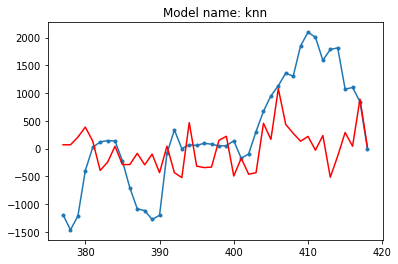

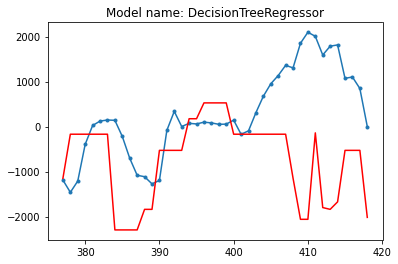

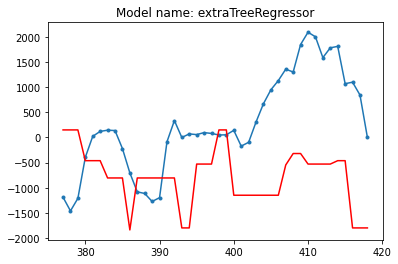

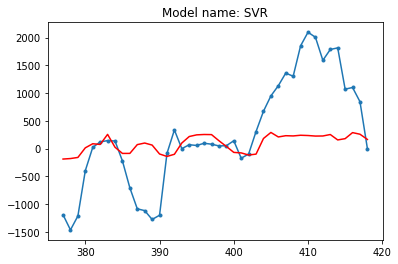

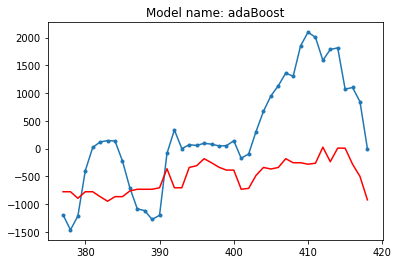

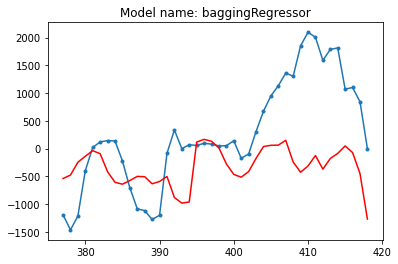

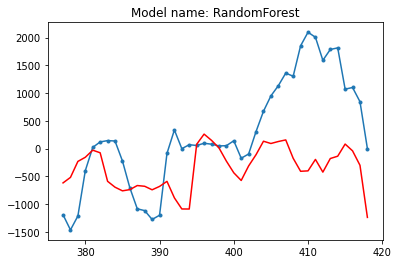

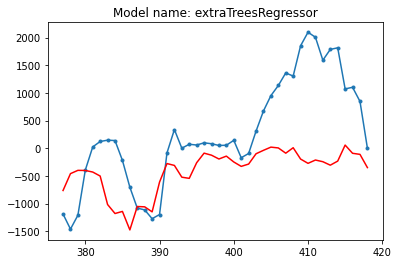

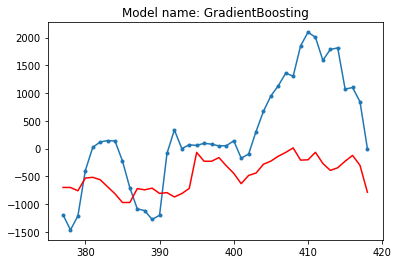

{'knn': 751.0199659863945,
 'DecisionTreeRegressor': 1238.6557142857143,
 'extraTreeRegressor': 1321.714523809524,
 'SVR': 673.2345893247651,
 'adaBoost': 919.2747738282127,
 'baggingRegressor': 859.6450404761904,
 'RandomForest': 848.5602142857143,
 'extraTreesRegressor': 814.6892571428571,
 'GradientBoosting': 898.5117747192741}

In [204]:
evaluate_models(models,X, y, Xtest , yTest)